In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
import torch.optim as optim
import scipy.misc
print(torch.__version__)



device = torch.device('cuda:1'if torch.cuda.is_available()else 'cpu')




transform = transforms.Compose(
   [transforms.ToTensor(),
    transforms.Normalize((0.13,), (0.308,))])





epochs = 5;
lr = 0.0001;
batch_size = 1;
num_classes = 10;


# In[5]:


train_dataset = torchvision.datasets.MNIST(root = '/home/anil/data',train =True,transform = transform,download = True)
test_dataset = torchvision.datasets.MNIST(root='home/anil/data',
                                          train=False, 
                                          transform=transform,download = True)


# In[6]:


valid_dataset = torchvision.datasets.MNIST(root = '/home/anil/data',train =True,transform = transform,download = True)


# In[7]:


num_train = len(train_dataset)
indices = list(range(num_train))
split=int(np.floor(0.2*num_train))


# In[8]:


tr_idx,valid_idx = indices[split:],indices[:split]


# In[9]:


np.random.seed(0)
np.random.shuffle(indices)


# In[10]:


trainsampler = SubsetRandomSampler(tr_idx)
validsampler = SubsetRandomSampler(valid_idx)


# In[11]:


trainloader = torch.utils.data.DataLoader(dataset = train_dataset,sampler = trainsampler,batch_size = batch_size,shuffle = False)
testloader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size , shuffle=True)
validloader = torch.utils.data.DataLoader(dataset = train_dataset,sampler = validsampler,batch_size = batch_size,shuffle = False)


# In[12]:


#to show image
def process_normal_img(img):
    img = img*0.3081+0.1307
    npimg = img.numpy()
    return (np.transpose(npimg,(1,2,0)))


# In[13]:


def process_network_img(img):
    npimg = img.detach().numpy
    return (np.transpose(npimg,(1,2,0)))


class ConvNet(nn.Module):
     def __init__(self,num_classes = 10):
            super (ConvNet,self).__init__()
            self.layer1 = nn.Sequential(
                   nn.Conv2d(1, 32 , kernel_size =3 , stride = 1, padding = 1), #25088
                   nn.BatchNorm2d(32),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size = 2, stride = 2))
            self.layer2 = nn.Sequential(
                   nn.Conv2d(32,32,kernel_size = 3 , stride = 1,padding = 1),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size = 2 , stride = 2))
            self.fc1 = nn.Linear(7*7*32,500)
            self.fc2 = nn.Linear(500,10)
            
    
     def forward(self,x):
            x1 = self.layer1(x)
            x2 = self.layer2(x1)
            out = x2.reshape(x2.size(0),-1)
            out = self.fc1(out)
            out = self.fc2(out)
            return(x1,x2,out)






0.4.1


In [2]:
modelroot = '/home/anil/data/MNIST/MNISTsaved/saved_model2'

In [3]:
model = ConvNet()
model.load_state_dict(torch.load(modelroot))

In [55]:
print('Reloading')

print(model)

#getting images
dataiter = iter(testloader)
act_img,labels = dataiter.next()
test_img = process_normal_img(torchvision.utils.make_grid(act_img))
classes = ['0','1','2','3','4','5','6','7','8','9']
softmax = nn.Softmax(dim = 0)
print(torchvision.utils.make_grid(act_img).shape)

Reloading
ConvNet(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=1568, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)
torch.Size([3, 28, 28])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual Images
torch.Size([3, 28, 28])
(28, 28, 3)


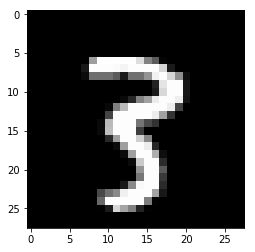

In [5]:
print('Actual Images')
plt.figure()
plt.imshow(test_img)
print(torchvision.utils.make_grid(act_img).shape)
print(test_img.shape)

In [9]:
print(act_img.shape)
#print(labels[2])

print(test_img.shape)
print(torchvision.utils.make_grid(act_img).shape)

torch.Size([1, 1, 28, 28])
(28, 28, 3)
torch.Size([3, 28, 28])


In [6]:
c1out,c2out,out = model(act_img)
print('Actual Labels')
print(' '.join('%6s' %classes[labels[j]] for j in range(batch_size)))
pred_con = softmax(out)
print(pred_con)
sc,predicted = torch.max(out.data,1)
print(predicted)
score = sc
print('Predicted Labels')
print(' '.join('%6s' %classes[predicted.data.numpy()[j]] for j in range(batch_size)))


Actual Labels
     3
tensor([[1.1949e-09, 1.8443e-08, 6.1413e-06, 9.9787e-01, 7.3225e-10, 1.0746e-06,
         2.2102e-11, 8.8726e-06, 1.1325e-03, 9.7717e-04]],
       grad_fn=<SoftmaxBackward>)
tensor([3])
Predicted Labels
     3


/home/anil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  after removing the cwd from sys.path.


In [24]:

occn = []
k=0    
b = torch.zeros(7,7)
a = torch.zeros(1,1,28,28)
occ = torch.zeros(16,1,28,28)
#print((a[0,0,0:0+7,0:0+7]).size())
#print(b.size())
for i in range (4):
    for j in range(4):  
        a = act_img.clone()
        a[0,0,7*i:7*i+7,7*j:7*j+7] = b
        occ[k,:,:,:]=a
        
        #occ = occ*0.3081+0.1307
        #occn = occ.numpy()
        #print(occ)
        k=k+1
print(occ.shape)

torch.Size([16, 1, 28, 28])


In [26]:
#occn = torchvision.utils.make_grid(occ)


occn = process_normal_img(torchvision.utils.make_grid(occ))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(62, 242, 3)


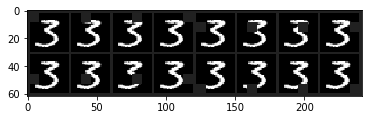

In [42]:
plt.imshow(occn)
print(occn.shape)

In [231]:
c1out,c2out,out = model(occ)
pcon = np.zeros((16,10))
for i  in range(16):
    op = out[i,:]
    op = op.detach().numpy()
    pcon[i] = np.exp(op)/(np.sum(np.exp(op)))
prob = np.amax(pcon,axis=1)
print(prob)

[0.99973124 0.99031734 0.99627805 0.99955249 0.9996292  0.99931586
 0.8885687  0.99968308 0.99967045 0.99965292 0.99882233 0.99962771
 0.99912244 0.99939799 0.99949831 0.99962378]


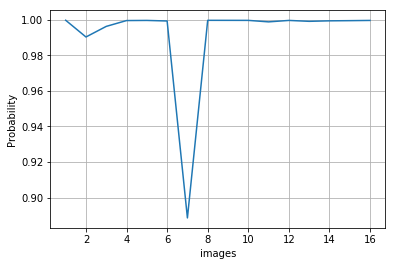

In [233]:
a = np.linspace(1,16,16)
plt.plot(a,prob)
plt.xlabel('images')
plt.ylabel('Probability')
plt.grid()